# Project Scenario
A multi-national firm has hired you as a data engineer. Your job is to access and process data as per requirements.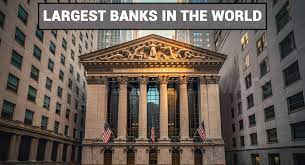

- Your boss asked you to compile the list of the **top 10 largest banks** in the world ranked **by market capitalization** in **billion USD**.
- Further, you need to **transform** the data and store it in **USD, GBP, EUR, and INR** per the exchange rate information made available to you as a CSV file. 
- You should save the processed information table locally in a CSV format and as a database table. Managers from different countries will query the database table to extract the list and note the market capitalization value in their own currency.

Linkdata: 	https://web.archive.org/web/20230908091635 /https://en.wikipedia.org/wiki/List_of_largest_banks

# Directions
    1.Write a function to extract the tabular information from the given URL under the heading By Market Capitalization, and save it to a data frame.
    2. Write a function to transform the data frame by adding columns for Market Capitalization in GBP, EUR, and INR, rounded to 2 decimal places, based on the exchange rate information shared as a CSV file.
    3. Write a function to load the transformed data frame to an output CSV file.
    4. Write a function to load the transformed data frame to an SQL database server as a table.
    5. Write a function to run queries on the database table.
    6. Run the following queries on the database table:
            a. Extract the information for the London office, that is Name and MC_GBP_Billion
            b. Extract the information for the Berlin office, that is Name and MC_EUR_Billion
            c. Extract the information for New Delhi office, that is Name and MC_INR_Billion
    7. Write a function to log the progress of the code.
    8. While executing the data initialization commands and function calls, maintain appropriate log entries.


## Initial setup
Before you start building the code, you need to install the required libraries for it.
The libraries needed for the code are as follows:
1. **requests** - The library used for accessing the information from the URL.
2. **bs4** - The library containing the BeautifulSoup function used for webscraping.
3. **pandas** - The library used for processing the extracted data, storing it to required formats and communicating with the databases
4. **sqlite3** - The library required to create a database server connection.    
5. **numpy** - The library required for the mathematical rounding operation as required in the objectives.
6. **datetime** - The library containing the function datetime used for extracting the timestamp for logging purposes.

In [1]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np
import sqlite3
from datetime import datetime 
print('completed import libs')

completed import libs


In [2]:
##Variance
url = 'https://web.archive.org/web/20230908091635 /https://en.wikipedia.org/wiki/List_of_largest_banks'
table_attribs = ["Bank_name", "MC_USD_Billion"]

### Task1 Wragling data
- 1.Write a function to extract the tabular information from the given URL under the heading By Market Capitalization, and save it to a data frame

In [3]:
def extract(url,table_attribs):
    page = requests.get(url).text
    data = BeautifulSoup(page,'html.parser')
    tables = data.find_all('tbody')
    df = pd.DataFrame(columns=table_attribs)

    rows = tables[0].find_all('tr')
    for row in rows:
        col = row.find_all('td')
        if len(col)>=3:
            if col[1] is not None:
                data_dict = {"Bank_name": col[1].get_text(strip=True),
                                 "MC_USD_Billion": col[2].get_text(strip=True)}
                
                df1 = pd.DataFrame(data_dict, index=[0])
                df = pd.concat([df,df1], ignore_index=True)
    return(df)

In [34]:
extract(url,table_attribs)

,Bank_name,MC_USD_Billion
0,JPMorgan Chase,432.92
1,Bank of America,231.52
2,Industrial and Commercial Bank of China,194.56
3,Agricultural Bank of China,160.68
4,HDFC Bank,157.91
5,Wells Fargo,155.87
6,HSBC Holdings PLC,148.90
7,Morgan Stanley,140.83
8,China Construction Bank,139.82
9,Bank of China,136.81


### Task 2: Transform data
- 2. Write a function to transform the data frame by adding columns for Market Capitalization in GBP, EUR, and INR, rounded to 2 decimal places, based on the exchange rate information shared as a CSV file.

In [4]:
#Created Rate Conver USD vs GBP|EUR|INR
exchange_rate = {
    "GBP": float(2.1),
    "EUR": float(3.184),
    "INR": float(9.123)
# Suppose I want to input for fun
#     "GBP": float(input("Input Rate USD/GBP: ")),
#     "EUR": float(input("Input Rate USD/EUR: ")),
#     "INR": float(input("Input Rate USD/INR: "))
}
print(exchange_rate)

{'GBP': 2.1, 'EUR': 3.184, 'INR': 9.123}


In [5]:
df = extract(url,table_attribs)

In [7]:
print("Các cột hiện có trong DataFrame:", df.columns)

Các cột hiện có trong DataFrame: Index(['Bank_name', 'MC_USD_Billion'], dtype='object')


In [8]:
def transform(df):
    MC_USD_Billion = df["MC_USD_Billion"].tolist()
    MC_USD_Billion = [float("".join(x.split('.'))) for x in MC_USD_Billion]
    MC_USD_Billion = [np.round(x/100,2) for x in MC_USD_Billion]
    df["MC_USD_Billion"] = MC_USD_Billion
    return df

In [9]:
def convert_rate():
    df["MC_GBP_Billion"] = np.round(df["MC_USD_Billion"] * exchange_rate["GBP"], 2)
    df["MC_EUR_Billion"] = np.round(df["MC_USD_Billion"] * exchange_rate["EUR"], 2)
    df["MC_INR_Billion"] = np.round(df["MC_USD_Billion"] * exchange_rate["INR"], 2)

In [10]:
transform(df)

,Bank_name,MC_USD_Billion
0,JPMorgan Chase,432.92
1,Bank of America,231.52
2,Industrial and Commercial Bank of China,194.56
3,Agricultural Bank of China,160.68
4,HDFC Bank,157.91
5,Wells Fargo,155.87
6,HSBC Holdings PLC,148.90
7,Morgan Stanley,140.83
8,China Construction Bank,139.82
9,Bank of China,136.81


In [11]:
convert_rate()

In [12]:
print(df)

                                 Bank_name  MC_USD_Billion  MC_GBP_Billion  \
0                           JPMorgan Chase          432.92          909.13   
1                          Bank of America          231.52          486.19   
2  Industrial and Commercial Bank of China          194.56          408.58   
3               Agricultural Bank of China          160.68          337.43   
4                                HDFC Bank          157.91          331.61   
5                              Wells Fargo          155.87          327.33   
6                        HSBC Holdings PLC          148.90          312.69   
7                           Morgan Stanley          140.83          295.74   
8                  China Construction Bank          139.82          293.62   
9                            Bank of China          136.81          287.30   

   MC_EUR_Billion  MC_INR_Billion  
0         1378.42         3949.53  
1          737.16         2112.16  
2          619.48         1774.97

### Task 3: Convert csv
- Write a function to load the transformed data frame to an output CSV file.

In [13]:
csv_path = './Ranking_Bank_by_cap.csv'

In [14]:
def load_to_csv(df, csv_path):
    df.to_csv(csv_path)

### Task 4 Load to SQL
- 4. Write a function to load the transformed data frame to an SQL database server as a table.

In [15]:
db_name = 'World_Bank.db'
table_name = 'Bank_by_Cap'

In [16]:
def load_to_db(df, sql_connection, table_name):
    df.to_sql(table_name, sql_connection, if_exists='replace', index=False)

### Task 5: Run Queries: 
- 5.Write a function to run queries on the database table.

In [17]:
def run_query(query_statement, sql_connection):
    print(query_statement)
    query_output = pd.read_sql(query_statement, sql_connection)
    print(query_output)

### Task 6: Run Many Queries: 
6. Run the following queries on the database table:
        a. Extract the information for the London office, that is Name and MC_GBP_Billion
        b. Extract the information for the Berlin office, that is Name and MC_EUR_Billion
        c. Extract the information for New Delhi office, that is Name and MC_INR_Billion

In [18]:
query_statement_6a = f"SELECT Bank_name,MC_GBP_Billion from {table_name}"
query_statement_6b = f"SELECT Bank_name,MC_EUR_Billion from {table_name}"
query_statement_6c = f"SELECT Bank_name,MC_INR_Billion from {table_name}"

### Task 7: Loggin Progress
- Write a function to log the progress of the code.

In [26]:
def log_progress(message): 
    timestamp_format = '%Y-%h-%d-%H:%M:%S' # Year-Monthname-Day-Hour-Minute-Second 
    now = datetime.now() # get current timestamp 
    timestamp = now.strftime(timestamp_format) 
    with open("./etl_project_ranking_bank_log.txt","a") as f: 
        f.write(timestamp + ' : ' + message + '\n')

### TASK 8: FINAL - EXECUTIVE
-  While executing the data initialization commands and function calls, maintain appropriate log entries.

In [20]:
url = 'https://web.archive.org/web/20230908091635 /https://en.wikipedia.org/wiki/List_of_largest_banks'
table_attribs = ["Bank_name", "MC_USD_Billion"]

db_name = 'World_Bank.db'
table_name = 'Bank_by_Cap'
csv_path = './Ranking_Bank_by_cap.csv'

query_statement_6a = f"SELECT Bank_name,MC_GBP_Billion from {table_name}"
query_statement_6b = f"SELECT Bank_name,MC_EUR_Billion from {table_name}"
query_statement_6c = f"SELECT Bank_name,MC_INR_Billion from {table_name}"

In [29]:
# Task 0: Start Process
log_progress('----------------------------------------------------------------')
log_progress('Preliminaries complete. Initiating ETL process')

#Task1 Extract data
df = extract(url, table_attribs)
log_progress('Data extraction complete. Initiating Transformation process')

#Task2 Transform data
df = transform(df)
convert_rate()
log_progress('Data transformation complete. Initiating loading process')

#Task 3: Load to csv
load_to_csv(df, csv_path)
log_progress('Data saved to CSV file')

#Task 4: Work with SQL 
#4.1Connect to DB
sql_connection = sqlite3.connect('World_Bank.db')
log_progress('SQL Connection initiated.')

#4.2 Load data into table
load_to_db(df, sql_connection, table_name)
log_progress('Data loaded to Database as table. Running the query')

#4.3 Running Queries
query_statement = f"SELECT * from {table_name}"
run_query(query_statement, sql_connection)
run_query(query_statement_6a, sql_connection)
run_query(query_statement_6b, sql_connection)
run_query(query_statement_6c, sql_connection)

#Task4; Completed
log_progress('Process Complete.')
sql_connection.close()

SELECT * from Bank_by_Cap
                                 Bank_name  MC_USD_Billion  MC_GBP_Billion  \
0                           JPMorgan Chase          432.92          909.13   
1                          Bank of America          231.52          486.19   
2  Industrial and Commercial Bank of China          194.56          408.58   
3               Agricultural Bank of China          160.68          337.43   
4                                HDFC Bank          157.91          331.61   
5                              Wells Fargo          155.87          327.33   
6                        HSBC Holdings PLC          148.90          312.69   
7                           Morgan Stanley          140.83          295.74   
8                  China Construction Bank          139.82          293.62   
9                            Bank of China          136.81          287.30   

   MC_EUR_Billion  MC_INR_Billion  
0         1378.42         3949.53  
1          737.16         2112.16  
2      

In [ ]:
db_name = 'World_Bank.db'
table_name = 'Bank_by_Cap'

def load_to_csv(df, csv_path):
    df.to_csv(csv_path)
    
#4.1Connect to DB
sql_connection = sqlite3.connect('World_Bank.db')
log_progress('SQL Connection initiated.')
    
def load_to_db(df, sql_connection, table_name):
    df.to_sql(table_name, sql_connection, if_exists='replace', index=False)